# Importing Libraries and Setting Up for Data Analysis and Model Training

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Loading the Dataset

In [75]:
data = pd.read_csv('/content/Dataset.csv')
df = pd.DataFrame(data)
df = df.drop(columns=[df.columns[0]])

# Converting Date Column to Unix Timestamp

In [76]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].astype(np.int64) // 10**9

# DataFrame

In [77]:
df

,Date,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after
0,1228089600,Station 2,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,1228176000,Station 2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,1228262400,Station 2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,1228348800,Station 2,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,1228435200,Station 2,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28827,1381881600,Station 34,5.2,31.6,0.0,5.6,NaN,NW,50.0,NE,...,33.0,11.0,1019.0,1011.6,NaN,NaN,19.0,30.3,No,No
28828,1381968000,Station 34,13.7,33.7,0.0,8.0,NaN,WNW,83.0,NNE,...,24.0,7.0,1005.5,1003.2,NaN,NaN,26.5,32.0,No,No
28829,1382054400,Station 34,10.6,23.3,0.0,11.0,NaN,SSW,33.0,SSW,...,25.0,35.0,1026.1,1023.8,NaN,NaN,17.3,22.0,No,No
28830,1382140800,Station 34,5.6,26.8,0.0,NaN,NaN,NE,35.0,NaN,...,69.0,22.0,1028.4,1022.7,NaN,NaN,14.3,26.0,No,No


# Describe

In [78]:
df.describe()

,Date,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Air Velocity,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM
count,2.883200e+04,28354.000000,28477.000000,28166.000000,10517.000000,6669.000000,25003.000000,28037.000000,27389.000000,28197.000000,27530.000000,22177.000000,22178.000000,14326.000000,14018.000000,28416.000000,27746.000000
mean,1.361359e+09,13.146205,24.069519,2.604679,5.756157,7.811786,37.165660,11.976353,16.375954,70.487038,52.272357,1018.205880,1015.621801,4.262948,4.418034,17.824975,22.604159
std,7.811829e+07,5.882556,6.111768,9.426280,4.872106,3.719222,13.318896,9.129764,9.057933,17.812435,21.057912,6.508948,6.426276,2.969848,2.718465,5.400596,5.959176
min,1.228090e+09,-4.800000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,0.300000,6.400000
25%,1.292198e+09,8.700000,19.500000,0.000000,2.900000,5.500000,28.000000,4.000000,9.000000,59.000000,36.000000,1013.900000,1011.300000,1.000000,2.000000,14.100000,18.200000
50%,1.362182e+09,13.900000,23.400000,0.000000,4.600000,8.900000,35.000000,11.000000,15.000000,71.000000,53.000000,1018.300000,1015.700000,5.000000,5.000000,18.300000,21.900000
75%,1.429164e+09,17.800000,27.800000,0.600000,7.200000,10.600000,44.000000,19.000000,22.000000,84.000000,67.000000,1022.600000,1020.000000,7.000000,7.000000,21.800000,26.200000
max,1.498349e+09,29.700000,47.300000,371.000000,86.200000,14.000000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1036.800000,8.000000,8.000000,37.700000,46.700000


# Handling Missing Values and Removing Unnecessary Columns

In [79]:
df = df.dropna(subset=['Date','Weather Station','Rain that day','Recorded Temperature at 9 AM','Moisture Level at 9 AM','Rain the day after','Air Velocity at  9 AM'])
df = df.drop(['Recorded Temperature at 3 PM','Recorded Temperature at 9 AM','Evaporation','Maximum Temperature'],axis=1)

# Checking Missing Values After Data Cleaning

In [88]:
df.isnull().sum()

Date                              0
Weather Station                   0
Minimum Temperature               0
Rainfall                          0
Sunshine                          0
Gust Trajectory                   0
Air Velocity                      0
Gust Trajectory at  9 AM          0
Gust Trajectory at  3 PM          0
Air Velocity at  9 AM             0
Air Velocity at  3 PM           823
Moisture Level at 9 AM            0
Moisture Level at 3 PM          815
Atmospheric Pressure at 9 AM      0
Atmospheric Pressure at 3 PM      0
Cloudiness at 9 AM                0
Cloudiness at 3 PM                0
Rain that day                     0
Rain the day after                0
dtype: int64

# Interpolating Missing Values for Continuous Variables

In [81]:
df['Minimum Temperature'] = df['Minimum Temperature'].interpolate(method='linear')

# Mapping Categorical Data to Numerical Values

In [82]:
direction_mapping = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

yes_no = {
    'Yes':1,
    'No':0
}

# Mapping Categorical Data to Numerical Values

In [83]:
df = df.replace({'Gust Trajectory': direction_mapping})
df = df.replace({'Gust Trajectory at  9 AM': direction_mapping})
df = df.replace({'Gust Trajectory at  3 PM': direction_mapping})
df = df.replace({'Rain the day after' : yes_no})
df = df.replace({'Rain that day' : yes_no})
df['Weather Station'] = df['Weather Station'].str.replace(r'Station (\d+)', r'\1', regex=True)

In [84]:
df['Gust Trajectory at  9 AM'] = df['Gust Trajectory at  9 AM'].interpolate(method='linear')
df['Gust Trajectory at  3 PM'] = df['Gust Trajectory at  3 PM'].interpolate(method='linear')

In [85]:
df['Atmospheric Pressure at 9 AM'] = df['Atmospheric Pressure at 9 AM'].interpolate(method='linear')
df['Atmospheric Pressure at 3 PM'] = df['Atmospheric Pressure at 3 PM'].interpolate(method='linear')

# Handling Missing Values for Categorical and Discrete Variables

In [87]:
df['Rainfall'] = df['Rainfall'].fillna(method='ffill')

df['Sunshine'] = df['Sunshine'].fillna(method='bfill')
df['Sunshine'] = df['Sunshine'].fillna(method='ffill')

mode_value = df['Gust Trajectory'].mode()[0]
df['Gust Trajectory'] = df['Gust Trajectory'].fillna(mode_value)

df['Air Velocity'] = df['Air Velocity'].fillna(method='bfill')
df['Air Velocity'] = df['Air Velocity'].fillna(method='ffill')

df['Cloudiness at 9 AM'] = df['Cloudiness at 9 AM'].fillna(method='bfill')
df['Cloudiness at 9 AM'] = df['Cloudiness at 9 AM'].fillna(method='ffill')

df['Cloudiness at 3 PM'] = df['Cloudiness at 3 PM'].fillna(method='bfill')
df['Cloudiness at 3 PM'] = df['Cloudiness at 3 PM'].fillna(method='ffill')

# Imputing Missing Values  Using Linear Regression

In [89]:
train_data = df.dropna(subset=['Air Velocity at  3 PM'])
predict_data = df[df['Air Velocity at  3 PM'].isna()]

X_train = train_data[['Air Velocity']]
y_train = train_data['Air Velocity at  3 PM']

X_predict = predict_data[['Air Velocity']]

model = LinearRegression()
model.fit(X_train, y_train)

# Predict the missing values
predicted_evaporation = model.predict(X_predict)

df.loc[df['Air Velocity at  3 PM'].isna(), 'Air Velocity at  3 PM'] = predicted_evaporation

In [90]:
train_data = df.dropna(subset=['Moisture Level at 3 PM'])
predict_data = df[df['Moisture Level at 3 PM'].isna()]

X_train = train_data[['Moisture Level at 9 AM']]
y_train = train_data['Moisture Level at 3 PM']

X_predict = predict_data[['Moisture Level at 9 AM']]

model = LinearRegression()
model.fit(X_train, y_train)

# Predict the missing values
predicted_evaporation = model.predict(X_predict)

df.loc[df['Moisture Level at 3 PM'].isna(), 'Moisture Level at 3 PM'] = predicted_evaporation

# Cleaning Data by Converting to Numeric and Removing Outliers

In [91]:
cleaned_df = df.copy()

for feature in df.columns:
    cleaned_df[feature] = pd.to_numeric(cleaned_df[feature], errors='coerce')

    mean = cleaned_df[feature].mean()
    std = cleaned_df[feature].std()

    threshold = mean + 3 * std

    outliers = cleaned_df[cleaned_df[feature] > threshold]

    cleaned_df = cleaned_df.drop(outliers.index)

    df = cleaned_df

# Visualizing Feature Correlations with a Heatmap

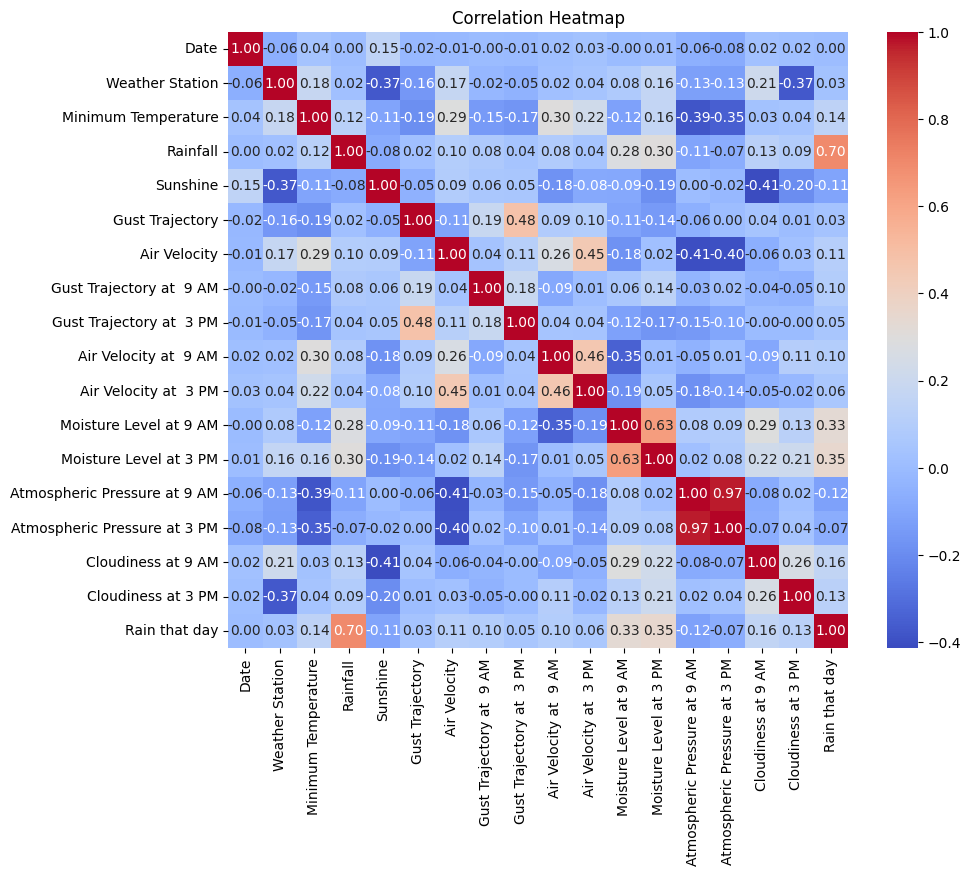

In [92]:
corr_matrix = df.iloc[:, :-1].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Visualizing Feature Distributions with Histograms

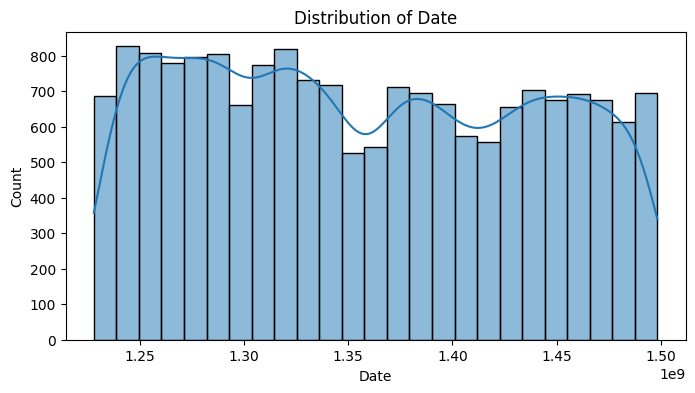

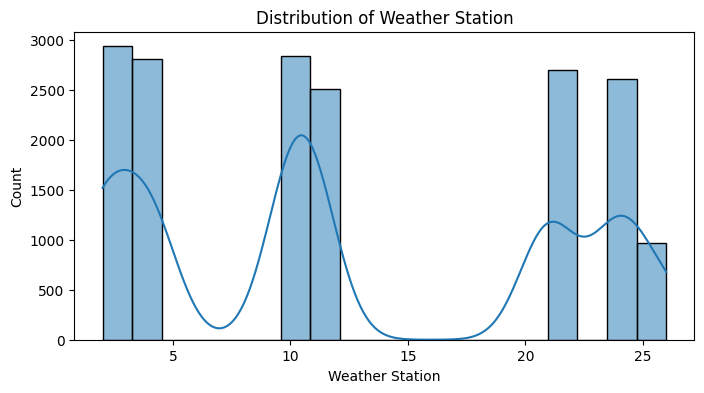

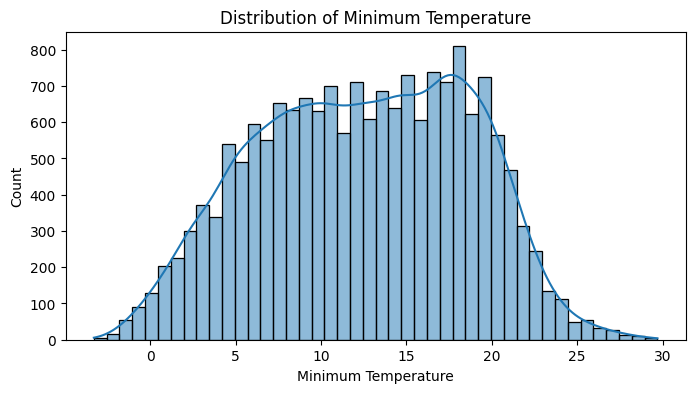

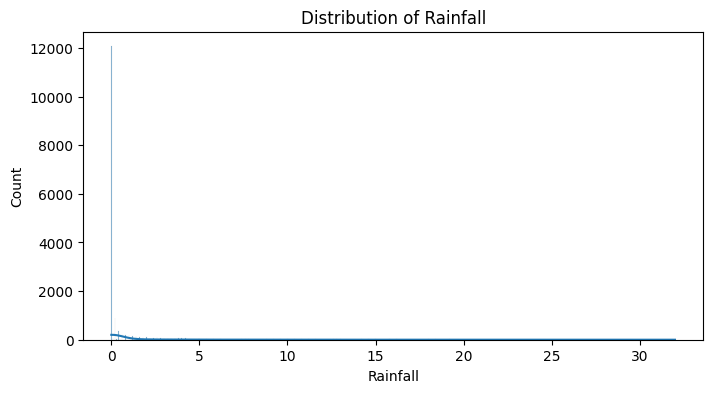

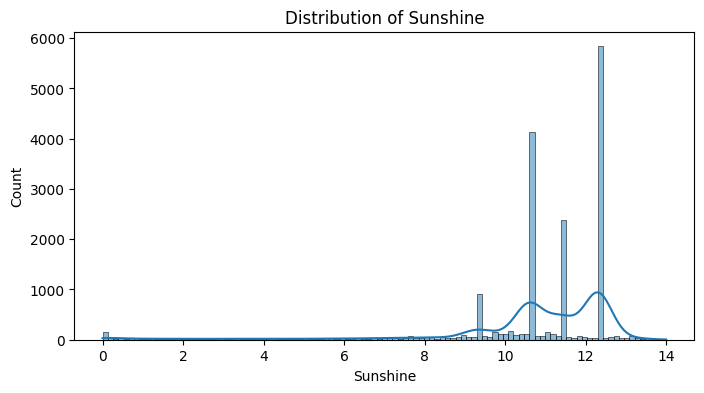

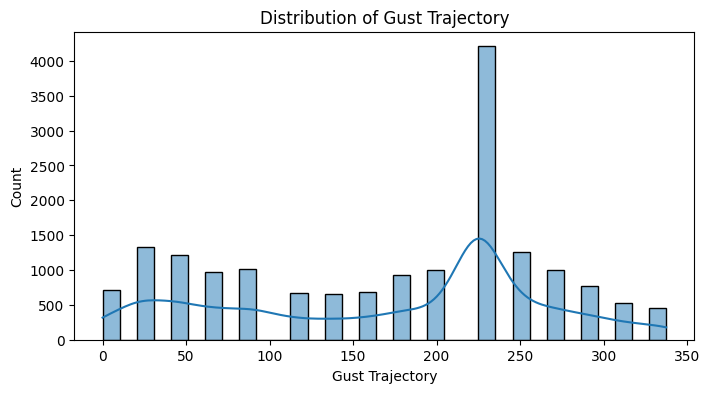

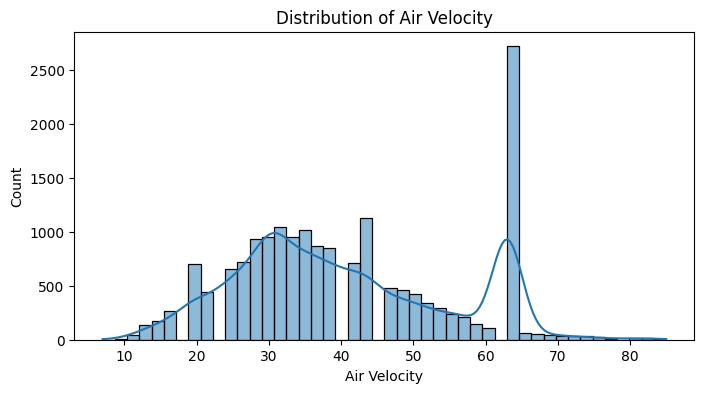

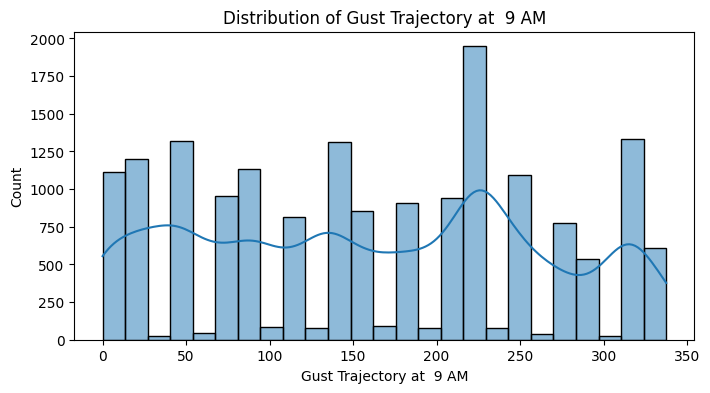

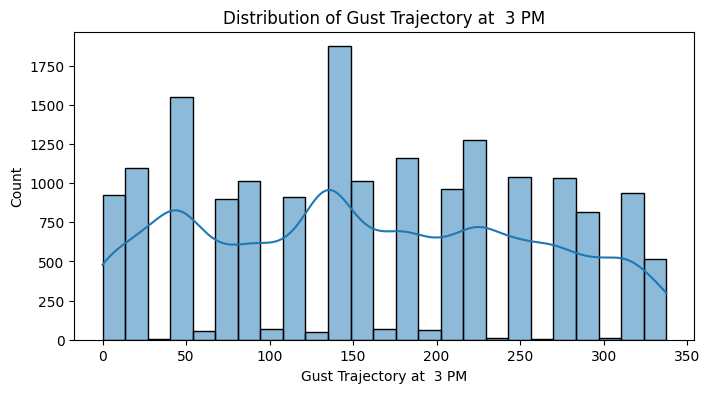

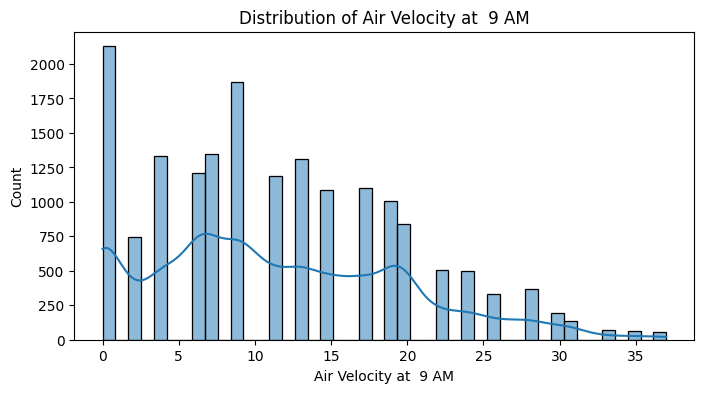

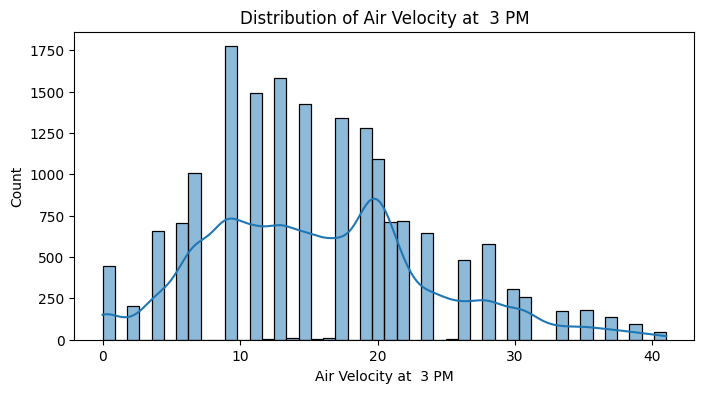

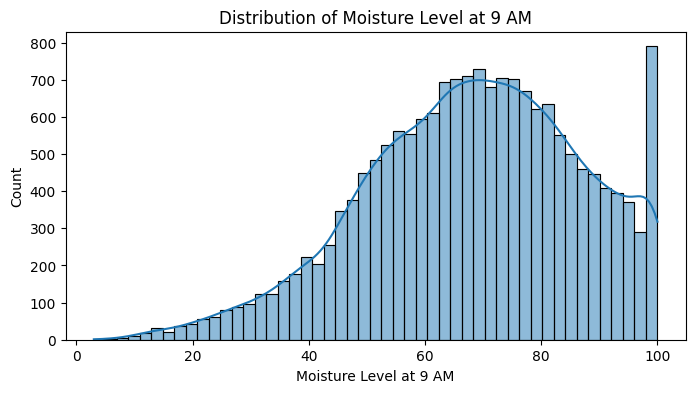

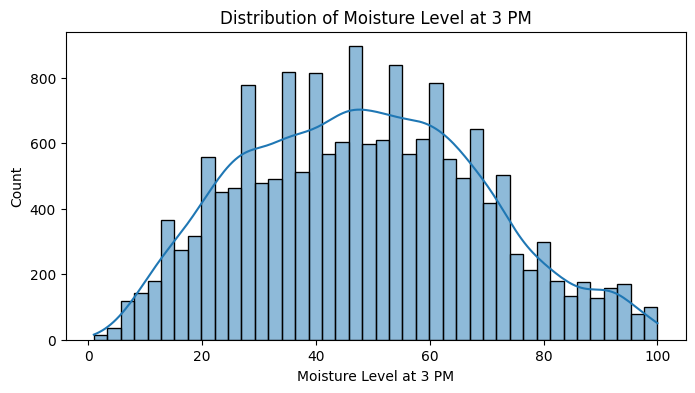

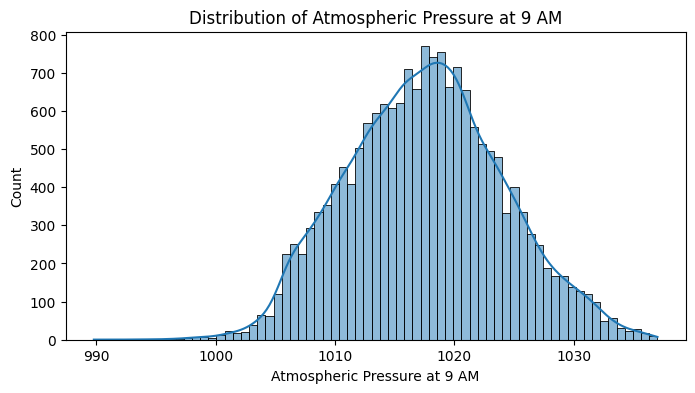

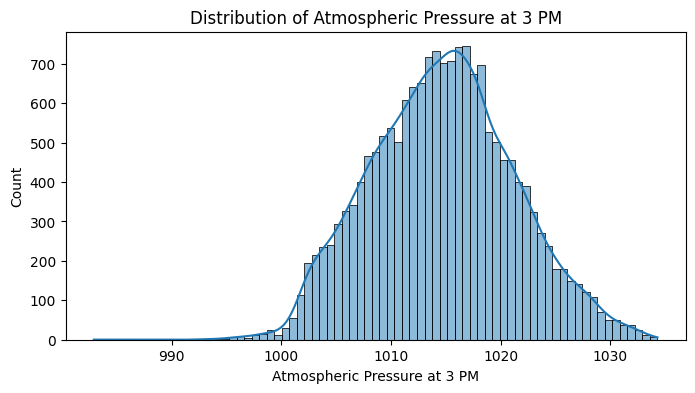

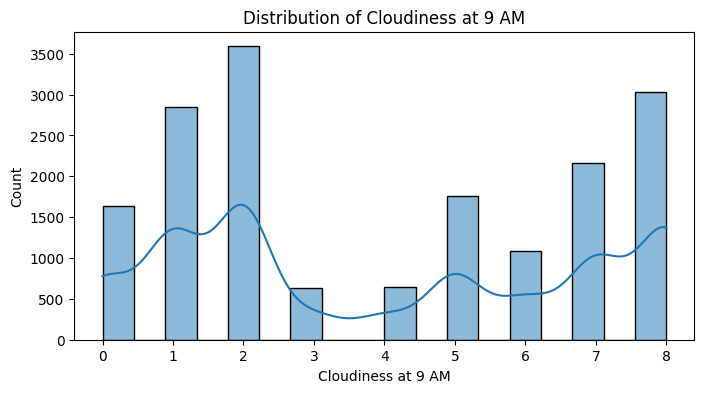

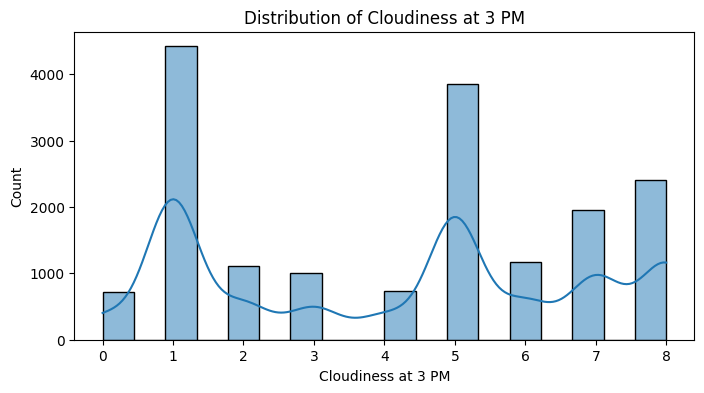

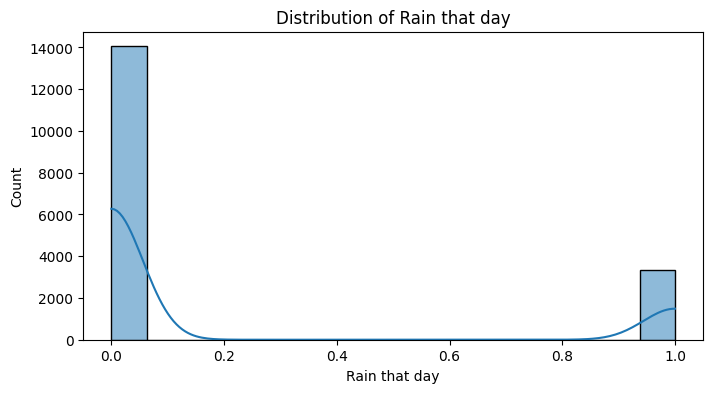

In [ ]:
# Histogram
for column in X.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Visualizing Feature Distributions by Target with Box Plots

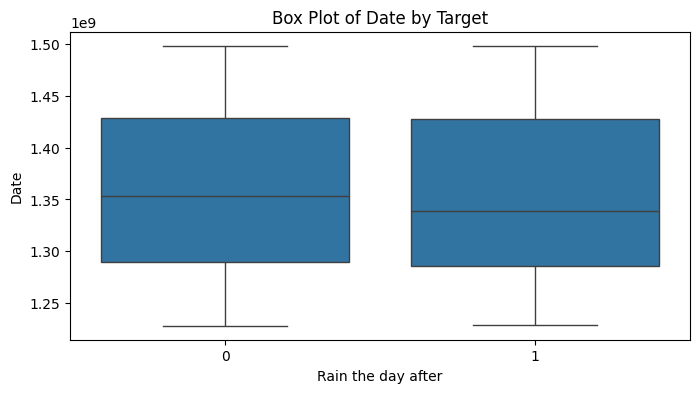

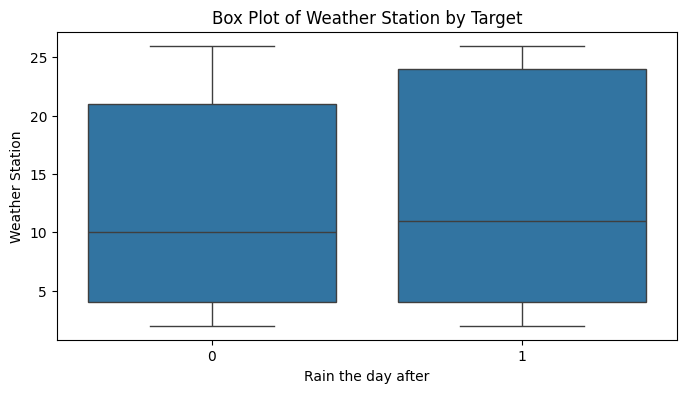

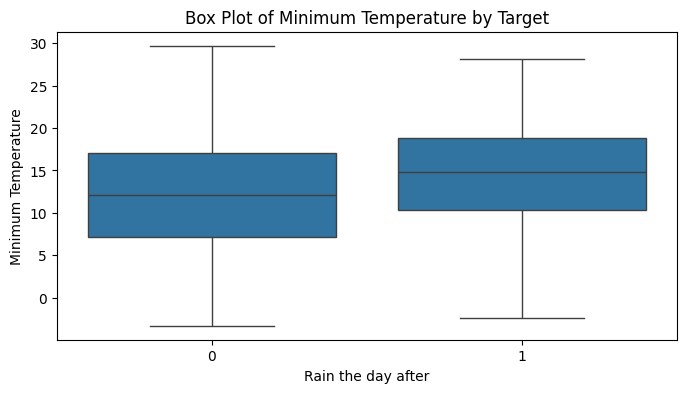

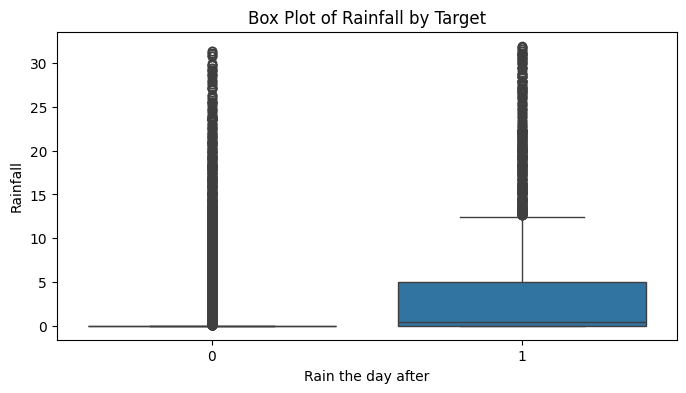

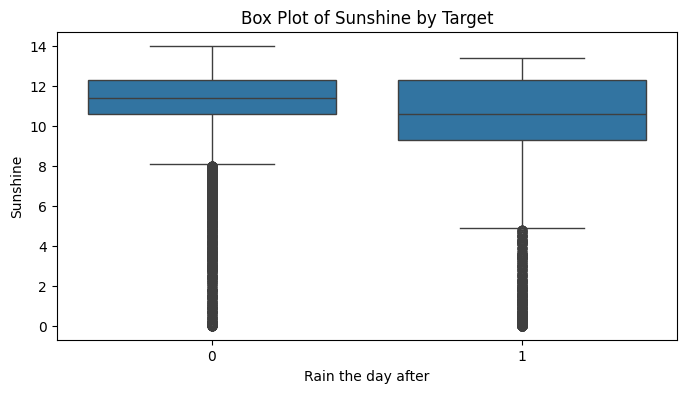

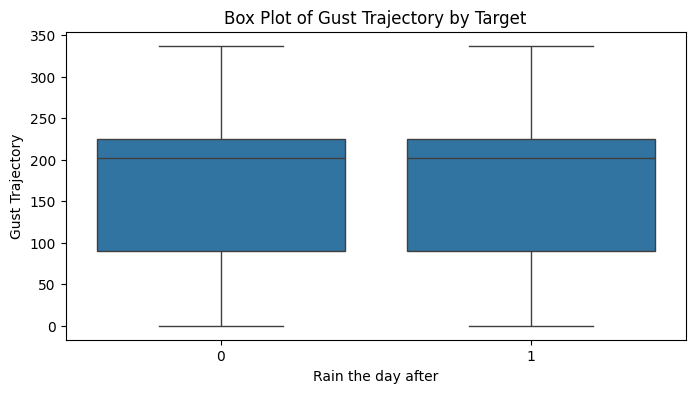

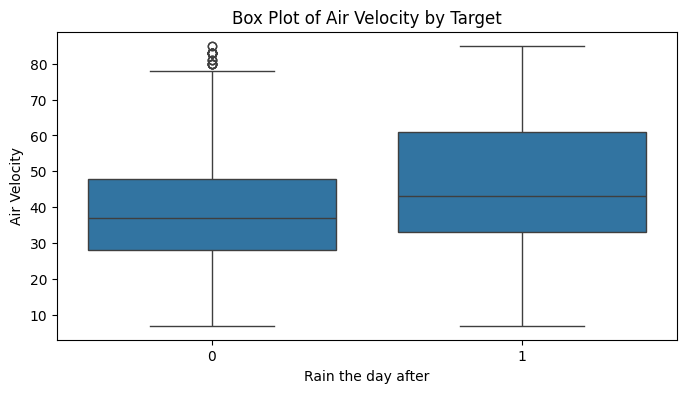

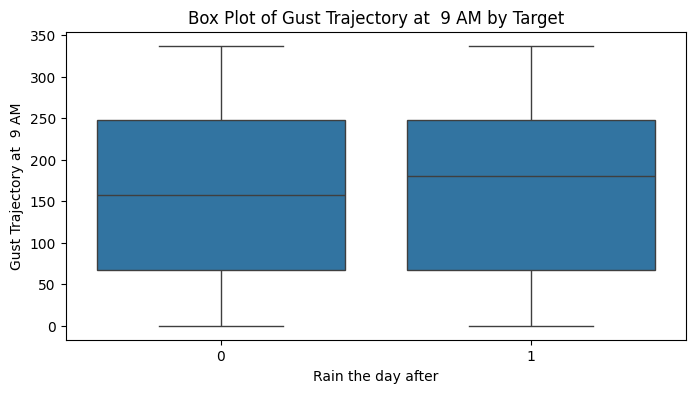

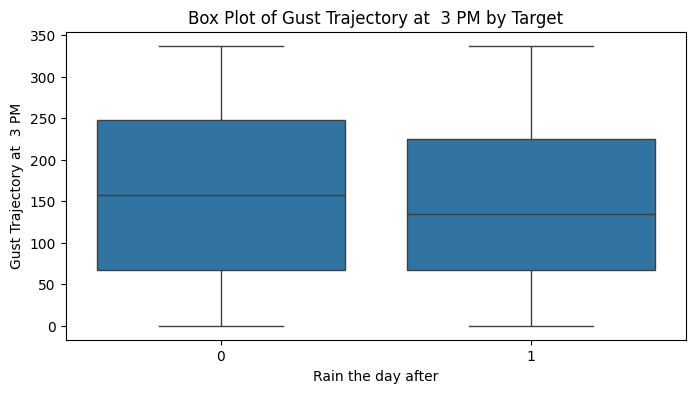

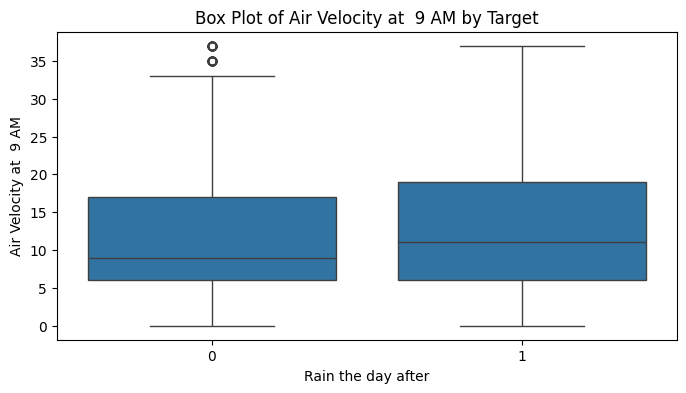

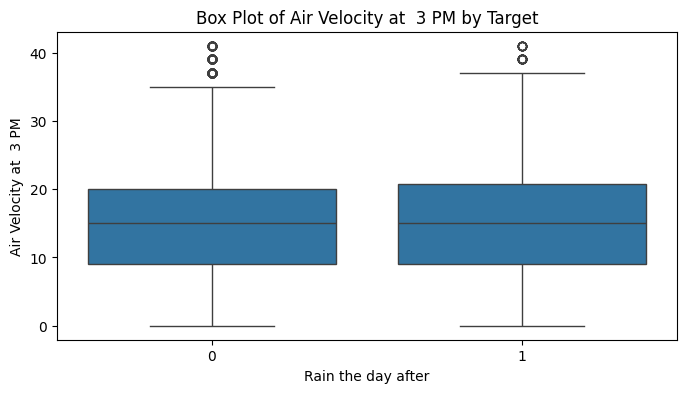

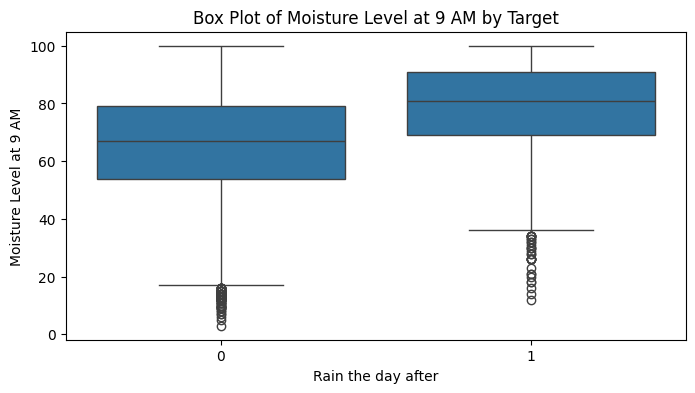

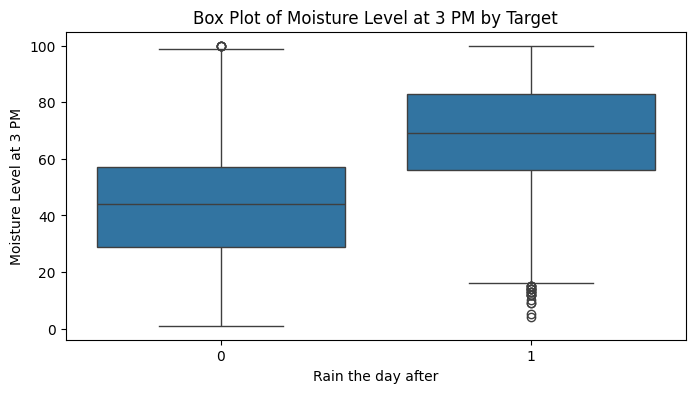

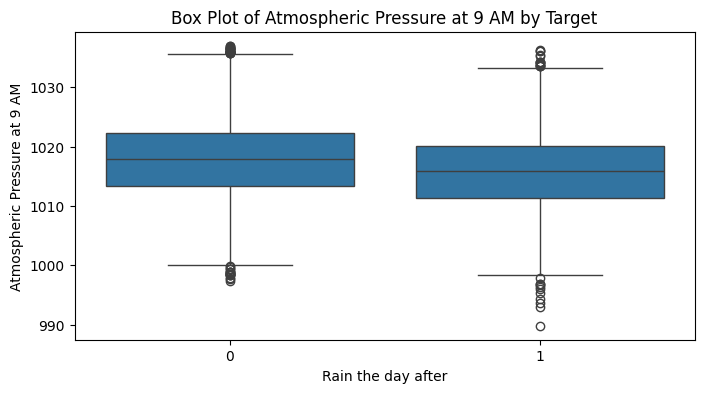

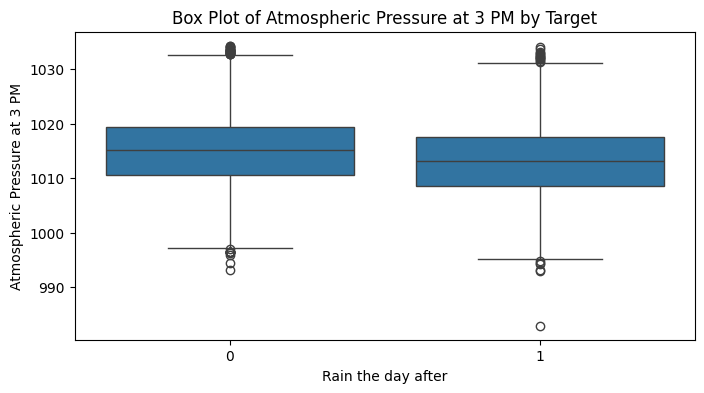

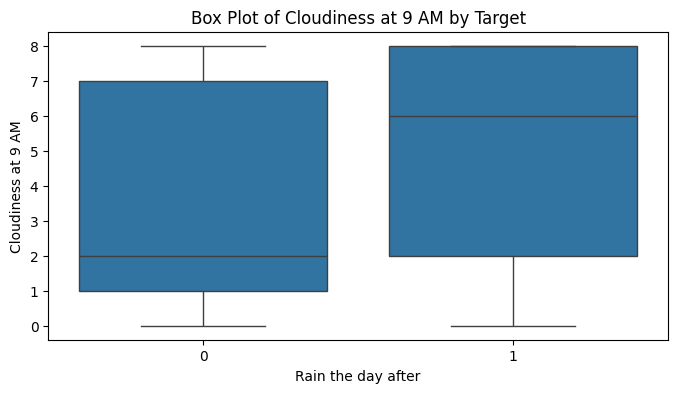

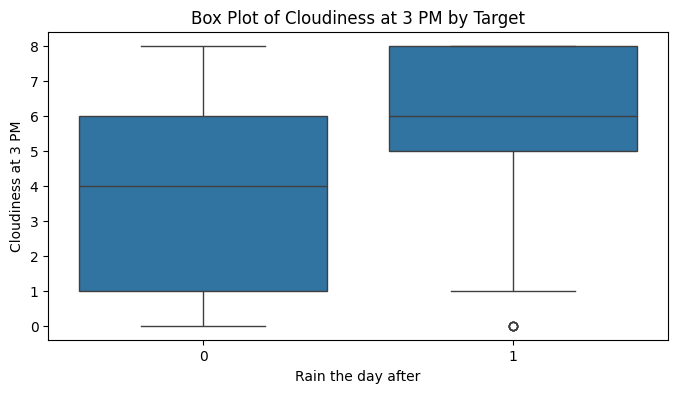

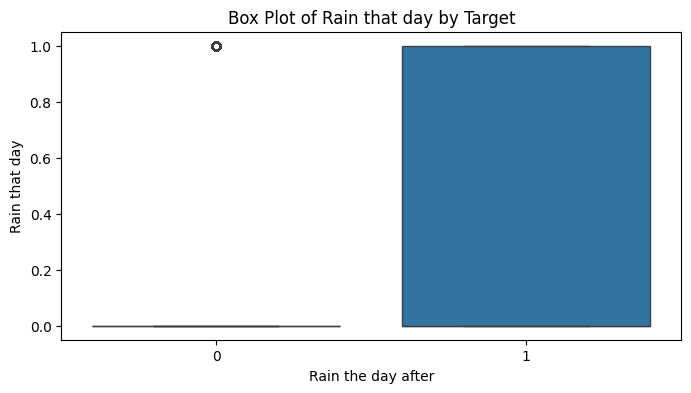

In [ ]:
for column in X.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=y, y=X[column])
    plt.title(f'Box Plot of {column} by Target')
    plt.show()

# Handling Imbalanced Data with SMOTE and Training a Decision Tree Classifier

In [93]:
from imblearn.over_sampling import SMOTE

X,y = df.iloc[:,:-1],df['Rain the day after']

smote = SMOTE(random_state=123)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

# Evaluating Model Performance

In [94]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Visualizing Model Performance with a Confusion Matrix

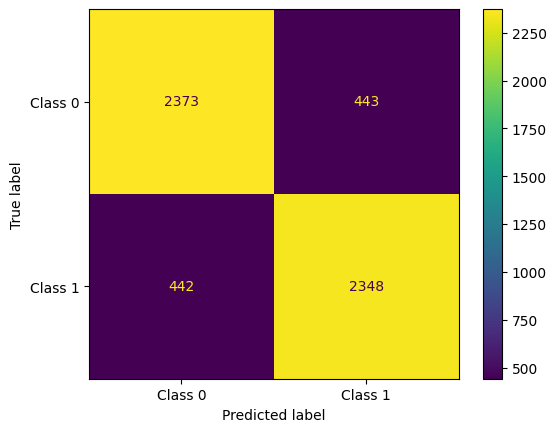

In [ ]:
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot()

In [ ]:
print(f'Accuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1:{f1:.4f}')

Accuracy: 0.8421
Precision: 0.8413
Recall: 0.8416
F1:0.8414
